In [38]:
import pandas as pd 
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize

In [2]:
data = pd.read_csv("P:/python/wine.csv")
data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [57]:
data1 = data.copy()
data3 = data.copy()

In [24]:
data_std = scale(data)
data_std

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.36217728,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.49941338, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.22769377, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.58316512, ..., -1.52437837,
        -1.42894777, -0.59516041]])

# PCA

In [25]:
model = PCA()
preds = model.fit_transform(data_std)
var = model.explained_variance_ratio_
var

array([0.39542486, 0.17836259, 0.10329102, 0.06627984, 0.06267875,
       0.0480556 , 0.03955707, 0.02500244, 0.02103871, 0.01873615,
       0.01613203, 0.01205691, 0.00925458, 0.00412945])

In [17]:
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 39.54,  57.38,  67.71,  74.34,  80.61,  85.42,  89.38,  91.88,
        93.98,  95.85,  97.46,  98.67,  99.6 , 100.01])

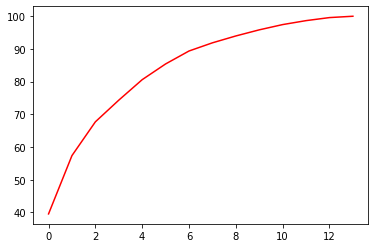

In [18]:
plt.plot(var1,color="red")

In [21]:
data2 = pd.concat([pd.DataFrame(preds[:,0:3],columns=['pc1','pc2','pc3'])], axis = 1)

In [22]:
data2

,pc1,pc2,pc3
0,-3.522934,-1.453098,-0.164795
1,-2.528858,0.330019,-2.026707
2,-2.785029,-1.036936,0.983238
3,-3.922588,-2.768210,-0.174968
4,-1.407511,-0.867773,2.025829
...,...,...,...
173,3.627996,-2.206617,-0.343668
174,2.942729,-1.752263,0.207480
175,3.027272,-2.756040,-0.940803
176,2.755222,-2.293784,-0.550474


# Hierarichical Clustering

In [43]:
data2_norm = normalize(data2)
data2_norm

array([[-0.92358578, -0.38094983, -0.04320341],
       [-0.77630881,  0.10130931, -0.62215838],
       [-0.88971846, -0.33126444,  0.31410974],
       [-0.81649212, -0.57620674, -0.03641986],
       [-0.53824998, -0.33184736,  0.77470271],
       [-0.8286604 , -0.53683762, -0.15851596],
       [-0.87369213, -0.37455099, -0.31044101],
       [-0.82841913, -0.55783182,  0.05045207],
       [-0.81366523, -0.26872637, -0.51549494],
       [-0.92162284, -0.24416905, -0.30165017],
       [-0.93640089, -0.33409953, -0.10738191],
       [-0.84411429, -0.24526845, -0.47677505],
       [-0.91157551, -0.25365442, -0.3235576 ],
       [-0.91146421, -0.2828859 , -0.29867802],
       [-0.87486134, -0.41567155, -0.24866604],
       [-0.84067919, -0.53697349,  0.07012828],
       [-0.70719636, -0.6659056 ,  0.23757744],
       [-0.77479061, -0.56853467,  0.27652819],
       [-0.82387129, -0.55663566, -0.10673723],
       [-0.9119626 , -0.40544871, -0.06273398],
       [-0.96727515, -0.23076502, -0.105

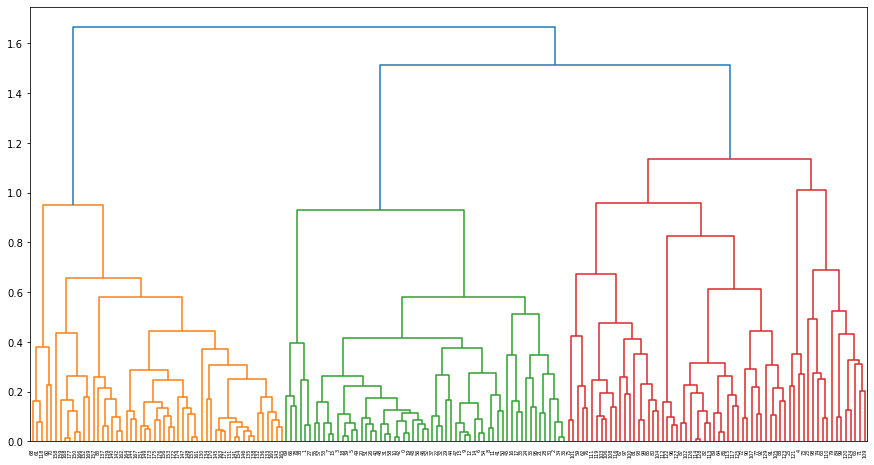

In [47]:
plt.figure(figsize=(15, 8)) 
dendrogram = sch.dendrogram(sch.linkage(data2_norm, method='average'))

In [48]:
model = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'average')
preds = model.fit_predict(data2_norm)
Clusters=pd.DataFrame(preds,columns=['Clusters'])
Clusters.value_counts()

Clusters
0           64
2           60
1           54
dtype: int64

In [52]:
data1['Clusters'] = Clusters
data1

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


# K_Means clustering

In [53]:
data2_norm

array([[-0.92358578, -0.38094983, -0.04320341],
       [-0.77630881,  0.10130931, -0.62215838],
       [-0.88971846, -0.33126444,  0.31410974],
       [-0.81649212, -0.57620674, -0.03641986],
       [-0.53824998, -0.33184736,  0.77470271],
       [-0.8286604 , -0.53683762, -0.15851596],
       [-0.87369213, -0.37455099, -0.31044101],
       [-0.82841913, -0.55783182,  0.05045207],
       [-0.81366523, -0.26872637, -0.51549494],
       [-0.92162284, -0.24416905, -0.30165017],
       [-0.93640089, -0.33409953, -0.10738191],
       [-0.84411429, -0.24526845, -0.47677505],
       [-0.91157551, -0.25365442, -0.3235576 ],
       [-0.91146421, -0.2828859 , -0.29867802],
       [-0.87486134, -0.41567155, -0.24866604],
       [-0.84067919, -0.53697349,  0.07012828],
       [-0.70719636, -0.6659056 ,  0.23757744],
       [-0.77479061, -0.56853467,  0.27652819],
       [-0.82387129, -0.55663566, -0.10673723],
       [-0.9119626 , -0.40544871, -0.06273398],
       [-0.96727515, -0.23076502, -0.105

C:\Users\Phani Ullamgunta\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


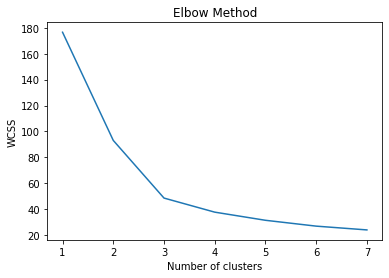

In [54]:
wcss = []
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(data2_norm)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 8), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [55]:
model_km = KMeans(3, random_state=42)
preds_km = model_km.fit_predict(data2_norm)
clusters_km = pd.DataFrame(preds_km, columns = ['clusters_km'])
clusters_km.value_counts()

clusters_km
1              65
0              60
2              53
dtype: int64

In [58]:
data3['clusters_km'] = clusters_km
data3

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusters_km
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


###### PCA
First i have loaded a data set and i have converted the data into standardized format. Then i have build the PCA model and i have fitted the data to model by keep the no. of components is default. And i got principal components(pc) then as you said i have taken three pc values and i have created a data frame and i have named them. And finally i got 67.71% of the data by taking three principal components.

###### Hierarichical Clustering
Now i have converted the three principal components into normalized data. Then i have ploted a dendrogram by giving linkage method average. Now i have build a model with AgglomerativeClustering by giving no. of clusters is 3 and linkage method is average then i have got three clusters. And three clusters are perfectly created as same as original data.

###### K_Means Clustering
Now i have plotted a elbow plot for finding the no. of clusters value and i have observed that three clusters are perfect. And i have started building model with kmeans by giving k=3. And i have got three clusters. And three cluster are perfectly created as same as original data.